# Imports

In [1]:
from numpy.random import seed
seed(888)
import tensorflow


In [2]:
import numpy as np
import tensorflow as tf
import os
import keras

from keras.datasets import cifar10

Using TensorFlow backend.


# Constants

In [62]:
LABEL_NAMES=['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
IMAGE_HEIGHT = 32
IMAGE_WIDTH = 32
IMAGE_PIXELS = IMAGE_HEIGHT*IMAGE_WIDTH
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

NR_CLASSES = 10

# Get Data

In [4]:
(x_train_all,y_train_all),(x_test,y_test) = cifar10.load_data()

In [5]:
!echo $PATH

/snap/jupyter/6/bin:/snap/jupyter/6/usr/sbin:/snap/jupyter/6/usr/bin:/snap/jupyter/6/sbin:/snap/jupyter/6/bin:/home/hp/snap/jupyter/common/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games


# Explore the data

In [6]:
from IPython.display import display
from keras.preprocessing.image import array_to_img

import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

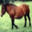

In [8]:
pic = array_to_img(x_train_all[7])
display(pic)

In [9]:
y_train_all.shape

(50000, 1)

In [10]:
y_train_all[7][0]

7

In [11]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

## Another way of plotting image (using matplotlib)

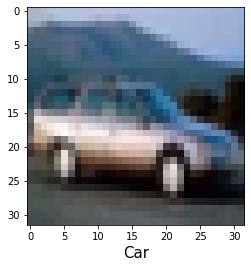

In [12]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]],fontsize=15)
plt.show()

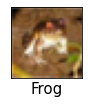

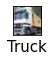

In [13]:
plt.figure(figsize=(15,5))

for i in range(2):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]],fontsize=15)
    plt.imshow(x_train_all[i])

In [14]:
x_train_all[0].shape

(32, 32, 3)

In [15]:
nr_images,x,y,c = x_train_all.shape
print(f'Number of train images = {nr_images} \t| width = {x} \t| height={y} \t| channels={c}')

Number of train images = 50000 	| width = 32 	| height=32 	| channels=3


# Preprocess Data 

In [16]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [17]:
x_train_all,x_test = x_train_all/255.0,x_test/255.0

In [18]:
##Checking the image type after scaling down

type(x_train_all[0][0][0][0]) ##we can see that int changed to float

numpy.float64

# Flatten

In [19]:
x_train_all = x_train_all.reshape(x_train_all.shape[0],TOTAL_INPUTS)

In [20]:
x_train_all.shape

(50000, 3072)

In [21]:
x_test = x_test.reshape(x_test.shape[0],TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


## Create Validation Dataset

In [22]:
##taking the first 10000 values for validation dataset

x_val=x_train_all[:VALIDATION_SIZE]
y_val=y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [23]:
## Making the training data separate from validation data
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

## Create a smaller dataset (for illustration)

In [24]:
x_train_xs=x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the neural network using keras

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [26]:
model_1 = Sequential([
    Dense(units=128,input_dim = TOTAL_INPUTS,activation='relu',name='m1_hidden1'),
    Dense(units=64, activation='relu',name='m1_hidden2'),
    Dense(16, activation = 'relu',name='m1_hidden3'),
    Dense(10,activation = 'softmax',name='m1_output')
])

model_1.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model_2 = Sequential()

model_2.add(Dropout(0.2,seed=42,input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128,activation='relu',name='m2_hidden1'))
model_2.add(Dense(64,activation='relu',name='m2_hidden2'))
model_2.add(Dense(16,activation='relu',name='m2_hidden3'))
model_2.add(Dense(10,activation='softmax',name='m2_output'))
                  
model_2.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model_3 = Sequential()

model_3.add(Dropout(0.2,seed=42,input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128,activation='relu',name='m2_hidden1'))
model_3.add(Dropout(0.25,seed=42))
model_3.add(Dense(64,activation='relu',name='m2_hidden2'))
model_3.add(Dense(16,activation='relu',name='m2_hidden3'))
model_3.add(Dense(10,activation='softmax',name='m2_output'))
                  
model_3.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
type(model_1)

keras.engine.sequential.Sequential

In [30]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


# Tensorboard (visualise learning)

In [31]:
from keras.callbacks import TensorBoard
from time import strftime

LOG_DIR='tensorboard_cifar_logs/'

In [32]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    print(folder_name)

    dir_paths = os.path.join(LOG_DIR,folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print("Successfully created directory")

    return TensorBoard(log_dir=dir_paths)

# Fit the model

In [33]:
samples_per_batch = 1000

In [34]:
#%%time              ##to know how much time is taken for execution of the below line
nr_epochs = 100
model_1.fit(x_train,y_train,batch_size = samples_per_batch,epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')],validation_data=(x_val,y_val))

Model 1 XL at 10 40
Successfully created directory
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
 7000/40000 [====>.........................] - ETA: 9s - loss: 2.3794 - accuracy: 0.0967 

/home/hp/snap/jupyter/common/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103055). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


40000/40000 [==============================] - 4s 91us/step - loss: 2.2785 - accuracy: 0.1339 - val_loss: 2.2181 - val_accuracy: 0.1772
Epoch 2/100
40000/40000 [==============================] - 2s 45us/step - loss: 2.1575 - accuracy: 0.2219 - val_loss: 2.1004 - val_accuracy: 0.2219
Epoch 3/100
40000/40000 [==============================] - 2s 44us/step - loss: 2.0580 - accuracy: 0.2601 - val_loss: 2.0297 - val_accuracy: 0.2718
Epoch 4/100
40000/40000 [==============================] - 2s 44us/step - loss: 1.9750 - accuracy: 0.2856 - val_loss: 1.9310 - val_accuracy: 0.3047
Epoch 5/100
40000/40000 [==============================] - 2s 45us/step - loss: 1.8982 - accuracy: 0.3124 - val_loss: 1.8547 - val_accuracy: 0.3253
Epoch 6/100
40000/40000 [==============================] - 2s 44us/step - loss: 1.8316 - accuracy: 0.3438 - val_loss: 1.7873 - val_accuracy: 0.3546
Epoch 7/100
40000/40000 [==============================] - 2s 49us/step - loss: 1.7710 - accuracy: 0.3641 - val_loss: 1.7522

In [35]:
#%%time              ##to know how much time is taken for execution of the below line
nr_epochs = 100
model_2.fit(x_train,y_train,batch_size = samples_per_batch,epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')],validation_data=(x_val,y_val))

Model 2 XL at 10 43
Successfully created directory
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 73us/step - loss: 2.2549 - accuracy: 0.1616 - val_loss: 2.1981 - val_accuracy: 0.1797
Epoch 2/100
40000/40000 [==============================] - 3s 73us/step - loss: 2.1781 - accuracy: 0.1875 - val_loss: 2.1467 - val_accuracy: 0.2004
Epoch 3/100
40000/40000 [==============================] - 3s 69us/step - loss: 2.1267 - accuracy: 0.2060 - val_loss: 2.0870 - val_accuracy: 0.2206
Epoch 4/100
40000/40000 [==============================] - 3s 78us/step - loss: 2.0655 - accuracy: 0.2338 - val_loss: 2.0251 - val_accuracy: 0.2367
Epoch 5/100
40000/40000 [==============================] - 3s 69us/step - loss: 2.0168 - accuracy: 0.2492 - val_loss: 1.9775 - val_accuracy: 0.2681
Epoch 6/100
40000/40000 [==============================] - 3s 64us/step - loss: 1.9703 - accuracy: 0.2669 - val_loss: 1.9419 - val_accuracy: 0.2669
Epoch 7/100

In [36]:
#%%time              ##to know how much time is taken for execution of the below line
nr_epochs = 100
model_3.fit(x_train,y_train,batch_size = samples_per_batch,epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')],validation_data=(x_val,y_val))

Model 3 XL at 10 49
Successfully created directory
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 86us/step - loss: 2.2751 - accuracy: 0.1313 - val_loss: 2.1876 - val_accuracy: 0.1686
Epoch 2/100
40000/40000 [==============================] - 3s 69us/step - loss: 2.1190 - accuracy: 0.2017 - val_loss: 1.9871 - val_accuracy: 0.2611
Epoch 3/100
40000/40000 [==============================] - 3s 68us/step - loss: 1.9740 - accuracy: 0.2693 - val_loss: 1.9042 - val_accuracy: 0.3005
Epoch 4/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.9135 - accuracy: 0.2989 - val_loss: 1.8416 - val_accuracy: 0.3298
Epoch 5/100
40000/40000 [==============================] - 2s 62us/step - loss: 1.8793 - accuracy: 0.3136 - val_loss: 1.8062 - val_accuracy: 0.3481
Epoch 6/100
40000/40000 [==============================] - 3s 66us/step - loss: 1.8491 - accuracy: 0.3244 - val_loss: 1.7893 - val_accuracy: 0.3488
Epoch 7/100

# Predictions on Individual Images

In [59]:
x_val[0].shape

(3072,)

In [60]:
test  =np.expand_dims(x_val[0],axis=0)
test.shape

(1, 3072)

In [62]:
np.set_printoptions(precision=3)

In [63]:
model_2.predict(test)

array([[0.007, 0.003, 0.081, 0.132, 0.166, 0.286, 0.256, 0.066, 0.001,
        0.002]], dtype=float32)

In [64]:
model_2.predict_classes(test)

array([5])

In [65]:
y_val[0]

array([6], dtype=uint8)

In [70]:
for i in range(10):
    test_img  =np.expand_dims(x_val[i],axis=0)
    predicted_val=model_2.predict_classes(test_img)[0]
    print(f'Actual value: {y_val[i][0]} vs predicted: {predicted_val}')

Actual value: 6 vs predicted: 5
Actual value: 9 vs predicted: 1
Actual value: 9 vs predicted: 9
Actual value: 4 vs predicted: 6
Actual value: 1 vs predicted: 1
Actual value: 1 vs predicted: 9
Actual value: 2 vs predicted: 2
Actual value: 7 vs predicted: 7
Actual value: 8 vs predicted: 8
Actual value: 3 vs predicted: 9


# Evaluation

In [38]:
model_2.metrics_names     ##list of models that can calculate for us

['loss', 'accuracy']

In [47]:
test_loss,test_accuracy=model_2.evaluate(x_test,y_test)
print(f'Test loss is :{test_loss:0.3} and Test accuracy is: {test_accuracy:0.3%}')

10000/10000 [==============================] - 1s 66us/step
Test loss is :1.45 and Test accuracy is: 48.950%


## Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix
import itertools

In [51]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=model_2.predict_classes(x_test))

In [52]:
conf_matrix.shape

(10, 10)

In [54]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [55]:
conf_matrix.max()

644

In [56]:
conf_matrix.min()

6

In [1]:
plt.figure(figsize=(7,7),dpi =220)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title("Confusion Matrix",fontsize=16)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

tick_marks = np.arange(NR_CLASSES)

plt.yticks(tick_marks,LABEL_NAMES)
plt.xticks(tick_marks,LABEL_NAMES)

plt.colorbar()

for i,j in itertools.product(range(nr_rows),range(nr_cols)):
    plt.text(j,i,conf_matrix[i,j],horizontalalignment='center',
            color='white' if conf_matrix[i,j]>conf_matrix.max()/2 else 'black')

NameError: name 'plt' is not defined

In [86]:
# True Positives (along the diagonal)
np.diag(conf_matrix)

array([599, 644, 342, 191, 448, 398, 569, 619, 542, 543])

In [88]:
recall = np.diag(conf_matrix)/np.sum(conf_matrix,axis=1)
print(recall)

precision = np.diag(conf_matrix)/np.sum(conf_matrix,axis=0)
print(precision)


[0.599 0.644 0.342 0.191 0.448 0.398 0.569 0.619 0.542 0.543]
[0.50805768 0.63137255 0.35005118 0.34981685 0.40542986 0.40862423
 0.49136442 0.48625295 0.64370546 0.58639309]


In [91]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score: {avg_recall:.2%}')

Model 2 recall score: 48.95%


In [93]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score: {avg_precision:.2%}')

Model 2 precision score: 48.61%


In [95]:
f1_score = (2*avg_precision*avg_recall)/(avg_recall+avg_precision)
print(f'Model 2 f-score :{f1_score:.2%}')

Model 2 f-score :48.78%
